In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [18]:
df = pd.read_csv('LungCapData.csv')
print(df.head(), len(df))

   LungCap  Age  Height Smoke  Gender Caesarean
0    6.475    6    62.1    no    male        no
1   10.125   18    74.7   yes  female        no
2    9.550   16    69.7    no  female       yes
3   11.125   14    71.0    no    male        no
4    4.800    5    56.9    no    male        no 725


LungCap denotes tidal volume in Inches Cubed<br>
Age is in years<br>
Height is in Inches<br>
Caesarean is a medical term for C-section birth but we will not be using this data in our model

In [4]:
df['Gender'] = df['Gender'].map({'male': 0., 'female': 1.})
df['Smoke'] = df['Smoke'].map({'yes': 0., 'no': 1.})
df['Caesarean'] = df['Caesarean'].map({'yes': 0., 'no': 1.})
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,1.0,0.0,1.0
1,10.125,18,74.7,0.0,1.0,1.0
2,9.550,16,69.7,1.0,1.0,0.0
3,11.125,14,71.0,1.0,0.0,1.0
4,4.800,5,56.9,1.0,0.0,1.0
...,...,...,...,...,...,...
720,5.725,9,56.0,1.0,1.0,1.0
721,9.050,18,72.0,0.0,0.0,0.0
722,3.850,11,60.5,0.0,1.0,1.0
723,9.825,15,64.9,1.0,1.0,1.0


In [5]:
X = df[['Age', 'Gender', 'Height', 'Smoke']]  
y = df['LungCap']
X = X.to_numpy()
y = y.to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.1333866182924488
R^2 Score: 0.8383420690060892


In [9]:
pct_error = (y_test - y_pred)/y_test * 100
pct_error = np.abs(pct_error)
np.mean(pct_error)

11.864175321419303

In [10]:
weights = model.coef_
bias = model.intercept_

In [11]:
weights, bias

(array([ 0.15537836, -0.41002965,  0.26801908,  0.55700631]),
 -11.76046182149991)

Text(0.5, 1.0, 'PLOT VS FEATURE HEIGHT')

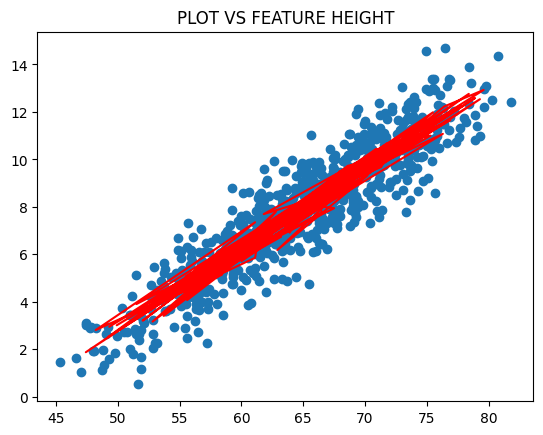

In [16]:
plt.scatter(df.Height, df.LungCap)
plt.plot(X_test[:, 2], y_pred, c='r')
plt.title("PLOT VS FEATURE HEIGHT")

Text(0.5, 1.0, 'PLOT VS FEATURE AGE')

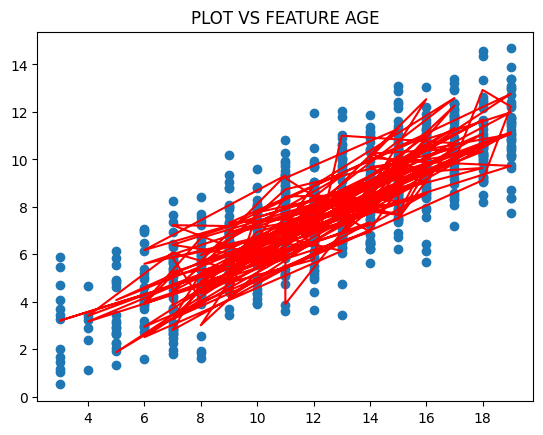

In [15]:
plt.scatter(df.Age, df.LungCap)
plt.plot(X_test[:, 0], y_pred, c='r')
plt.title("PLOT VS FEATURE AGE")

In [19]:
joblib.dump(model, "LinRegMODELpallav.pkl")

['LinRegMODELpallav.pkl']